In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

In [31]:
digits = datasets.load_digits()

In [32]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [33]:
X = digits.data
X.shape

(1797, 64)

In [34]:
y = digits.target
print(np.unique(y))

[0 1 2 3 4 5 6 7 8 9]


In [35]:
y = pd.get_dummies(y).values
y.shape

(1797, 10)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437, 10), (360, 10))

In [37]:
from keras.models import Sequential
from keras.layers import Dense


In [38]:
model = Sequential()

# 입력층 + 첫 번째 은닉층 (64차원 입력 → 32개 뉴런, ReLU 사용)
model.add(Dense(32, input_shape=(64,), activation='relu'))

# 두 번째 은닉층
model.add(Dense(32, activation='relu'))

# 출력층 (숫자 0~9니까 뉴런 10개, 소프트맥스 사용)
model.add(Dense(10, activation='softmax'))


In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [41]:
N_EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=N_EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

Epoch 1/30
45/45 [==============================] - 1s 5ms/step - loss: 3.0379 - accuracy: 0.3709 - val_loss: 1.5744 - val_accuracy: 0.5361
Epoch 2/30
45/45 [==============================] - 0s 2ms/step - loss: 1.0971 - accuracy: 0.6729 - val_loss: 0.8109 - val_accuracy: 0.7528
Epoch 3/30
45/45 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.8100 - val_loss: 0.5592 - val_accuracy: 0.8306
Epoch 4/30
45/45 [==============================] - 0s 2ms/step - loss: 0.4499 - accuracy: 0.8615 - val_loss: 0.4435 - val_accuracy: 0.8667
Epoch 5/30
45/45 [==============================] - 0s 2ms/step - loss: 0.3451 - accuracy: 0.8907 - val_loss: 0.3759 - val_accuracy: 0.8917
Epoch 6/30
45/45 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.9144 - val_loss: 0.3281 - val_accuracy: 0.8889
Epoch 7/30
45/45 [==============================] - 0s 2ms/step - loss: 0.2408 - accuracy: 0.9283 - val_loss: 0.2731 - val_accuracy: 0.9139
Epoch 8/30
45/45 [==

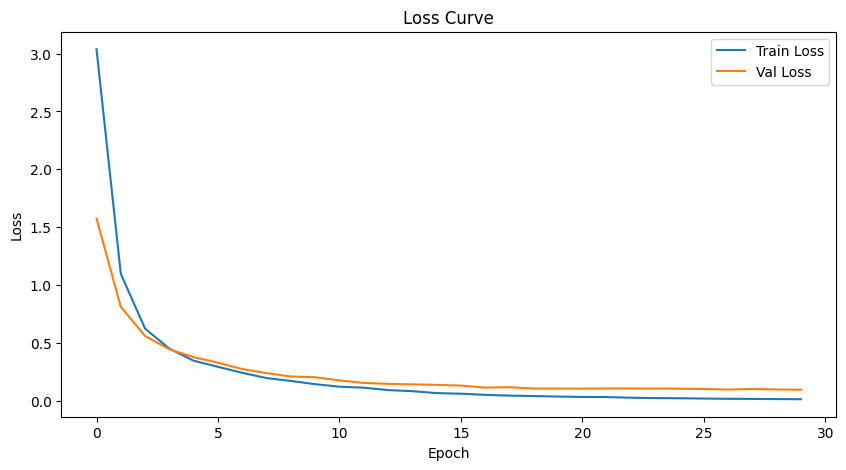

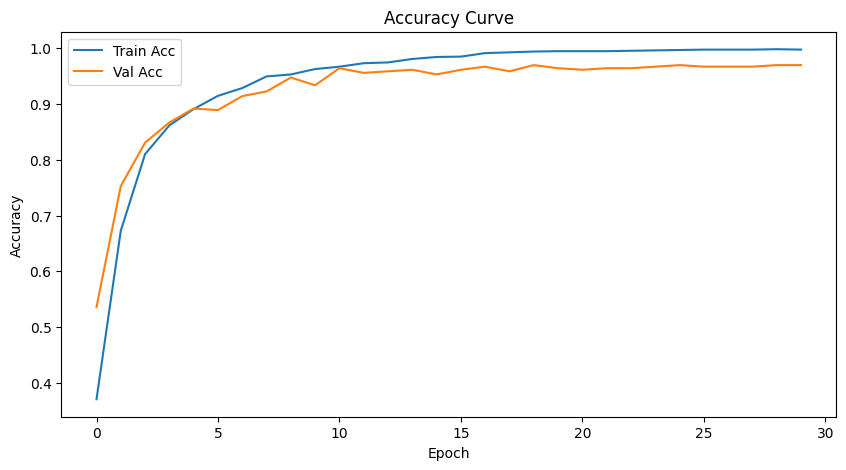

In [42]:
import matplotlib.pyplot as plt

# 손실(Loss) 시각화
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 정확도(Accuracy) 시각화
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [43]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 1ms/step - loss: 0.0945 - accuracy: 0.9694


[0.09453580528497696, 0.9694444537162781]

12/12 [==============================] - 0s 995us/step


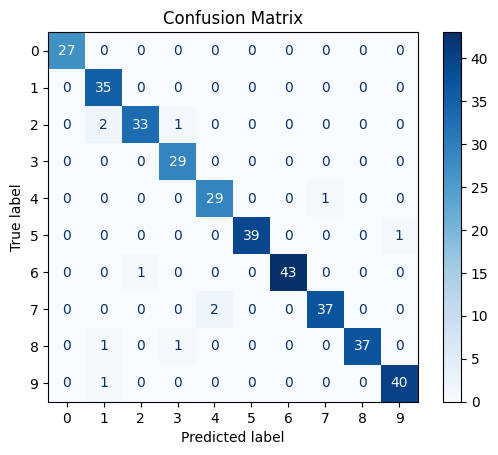

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()